In [1]:
# External Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Internal Libraries
from config import *

In [29]:
performance_log = pd.read_csv(DATA_DIR/'training'/'performance_benchmark'/'fine_grain_training.dat', sep=';')

result_name = 'test_dummy_data_96000row'
epochs = [250, 100, 50]
batches = [32, 16, 4]

In [30]:
# Loading the result
result = pd.read_csv(DATA_DIR/'output'/f'{result_name}.dat', sep=';')
rms_deviation = np.sqrt((result['Difference']**2).mean())
std_difference = result['Difference'].std()

execution_time = performance_log.query(f'training_name=="{result_name}"')['training_time'].iloc[0]
print(f'rms_deviation: {rms_deviation}')
print(f'std: {std_difference}')
print(f'execution_time: {execution_time}')

result

rms_deviation: 1.792468632425883
std: 1.326151188638256
execution_time: 1253.7166905403135


,Z,N,BSk24,Prediction,Difference
0,8.0,13.0,6.637698,9.433945,-2.796247
1,8.0,16.0,15.415710,24.422554,-9.006844
2,9.0,14.0,-0.672147,5.760331,-6.432478
3,9.0,17.0,14.857590,19.960714,-5.103124
4,10.0,14.0,-8.467610,-2.897897,-5.569713
...,...,...,...,...,...
724,103.0,153.0,89.398760,89.495544,-0.096784
725,104.0,154.0,93.717540,93.678250,0.039287
726,106.0,154.0,104.123600,105.978600,-1.855000
727,108.0,156.0,117.295200,119.775734,-2.480534


Text(0, 0.5, 'Z')

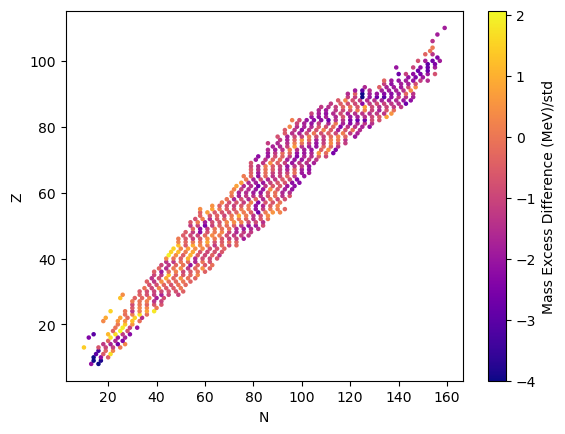

In [31]:
# Plot the mass excess difference across the nuclear landscape
diff_o_std = result['Difference']/std_difference
v_min, v_max = -4, 4

plt.scatter(result['N'], result['Z'], c=np.clip(diff_o_std, v_min, v_max), cmap='plasma', s=5)

plt.colorbar(label='Mass Excess Difference (MeV)/std')
plt.xlabel('N')
plt.ylabel('Z')

Text(0, 0.5, 'log_10(Val_Loss)')

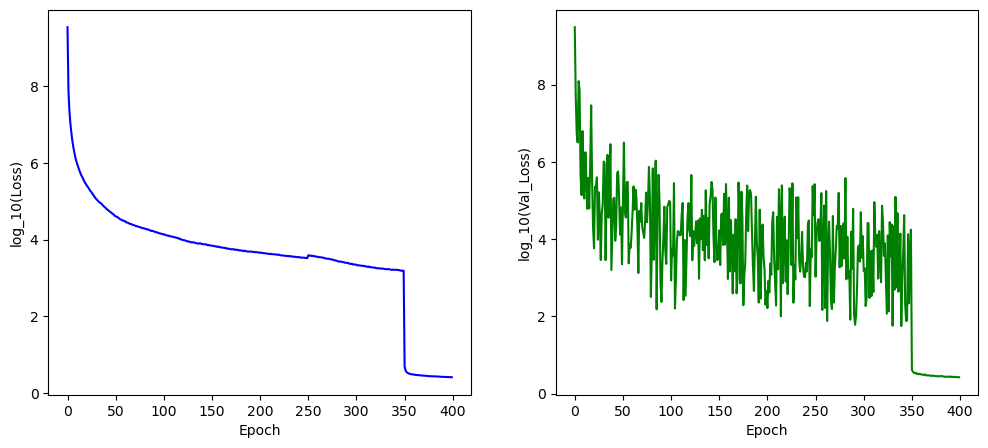

In [32]:
# Loss analyisis
# Combine the loss from several steps
loss_dir = DATA_DIR/'training'/'loss' 
loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.loss.dat' for i in range(3)]
val_loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.val_loss.dat' for i in range(3)]

loss_data = [np.loadtxt(file) for file in loss_file]
val_loss_data = [np.loadtxt(file) for file in val_loss_file]

loss_arr = [item for sublist in loss_data for item in sublist]
val_loss_arr = [item for sublist in val_loss_data for item in sublist]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(np.log(loss_arr), label='loss', color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('log_10(Loss)')

axes[1].plot(np.log(val_loss_arr), label='cos(x)', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('log_10(Val_Loss)')